In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(2019)
tf.set_random_seed(2019)

class MLP:
    def __init__(self, n_hidden=30, n_output=1):
        self.n_hidden = n_hidden
        self.n_output = n_output

        # define placeholders for training MLP
        self.x = tf.placeholder(tf.float32, shape=[None, 1])
        self.y = tf.placeholder(tf.float32, shape=[None, 1])
        self.dropout_rate = tf.placeholder(tf.float32)
        self.lr = tf.placeholder(tf.float32)

        self.predictions, self.loss, self.opt = self.build_graph(n_hidden=self.n_hidden, n_output=self.n_output)

    def build_graph(self, n_hidden=30, n_output=1):
        """
        Build computational graph for toy dataset with dropout

        Args:
            n_hidden: the number of hidden units in MLP.
            n_output: the size of output layer (=1)

        Returns:
            prob: probability of prediction (m, 1)
            loss: corss entropy loss
            learning rate: learning rate for optimizer (ex. SGD, RMSprop, Adam, etc.)
        """

        with tf.variable_scope('mlp'):
            # initializers for weight and bias
            w_init = tf.contrib.layers.variance_scaling_initializer()
            b_init = tf.constant_initializer(0.0)

            # 1st hidden layer (input dimension --> n_hidden)
            w0 = tf.get_variable('w0', [self.x.get_shape()[1], n_hidden], initializer=w_init)
            b0 = tf.get_variable('b0', [n_hidden], initializer=b_init)
            h0 = tf.matmul(self.x, w0) + b0
            h0 = tf.nn.relu(h0)
            h0 = tf.nn.dropout(h0, rate=self.dropout_rate)

            # 2nd hidden layer (n_hidden --> n_hidden)
            """
            Please implement the second fully connected layer
            with (n_hidden --> n_hidden)
            """
            w1 = tf.get_variable('w1', [h0.get_shape()[1], n_hidden], initializer=w_init)  #######################################
            b1 = tf.get_variable('b1', [n_hidden], initializer=b_init)
            h1 = tf.matmul(h0, w1) + b1
            h1 = tf.nn.relu(h1)
            h1 = tf.nn.dropout(h1, rate=self.dropout_rate)
            
            # 3nd hidden layer (n_hidden --> n_hidden)
            w2 = tf.get_variable('w2', [h1.get_shape()[1], n_hidden], initializer=w_init)
            b2 = tf.get_variable('b2', [n_hidden], initializer=b_init)
            h2 = tf.matmul(h1, w2) + b2
            h2 = tf.nn.relu(h2)
            h2 = tf.nn.dropout(h2, rate=self.dropout_rate)

            # output layer (n_hidden --> n_output)
            wo = tf.get_variable('wo', [h2.get_shape()[1], n_output], initializer=w_init)
            bo = tf.get_variable('bo', [n_output], initializer=b_init)
            predictions = tf.matmul(h2, wo) + bo
            
            # we don't need probability --> just regression problems
            # prob = tf.nn.softmax(logit, axis=1)
            # loss
            # loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            #    logits=logit, labels=self.y))
            """
            Please implement the Mean Squared Loss function
            """
            # loss
            #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=self.y))  #############################
            #loss = tf.reduce_mean(tf.math.squared_difference(logits=logit, labels=self.y)) 
            loss = tf.reduce_mean(tf.square(predictions - self.y)) 
            
            
            # optimizer
            opt = tf.train.AdamOptimizer(learning_rate=self.lr).minimize(loss)
        return predictions, loss, opt

In [2]:
mlp = MLP()
sess = tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True)))
sess.run(tf.global_variables_initializer())

W0730 16:36:49.727538 139988296189760 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
"""
Toy dataset = sine function with standard Gaussian noise ~ N(0, 1^2)
Training data (1-dimensional) --> only from -3 to 3

Test data (1-dimensional) --> from -6 to 6
You don't need to handle this part.
"""
x_train = np.linspace(-3, 3.2, 31, endpoint=False)
noise_train = 0.2 * np.random.randn(31)
y_train = np.sin(x_train) + noise_train

x_train, y_train = np.expand_dims(x_train, -1), np.expand_dims(y_train, -1)

x_test = np.linspace(-6, 6.2, 61, endpoint=False)
noise_test = np.random.randn(61)
y_test = np.sin(x_test) + 0.2 * noise_test

x_test, y_test = np.expand_dims(x_test, -1), np.expand_dims(y_test, -1)

In [4]:
from matplotlib import pyplot as plt
plt.figure()
plt.xlabel("$x$")
plt.ylabel("$y = \sin x + 0.2 \epsilon$ with $\epsilon$ ~ $N(0,1^2)$")
plt.plot(x_train, y_train, 'bo', color='black', label="Train data")
plt.plot(x_test, y_test, 'bo', color='red', label="Test data")
plt.ylim([-1.5, 1.5])
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
def train(net, sess, num_epoch=3000):
    # iterating epoch
    for epoch in range(num_epoch):
        # here we use batch gradient descent since the data size is small!!
        #feed_dict = # <-- Please implement this part!      #######################################################################
        
        feed_dict = {net.x: x_train,
                     net.y: y_train,
                     net.dropout_rate: 0.3, 
                     net.lr : 1e-3}        
        
        avg_loss, _ = sess.run([net.loss, net.opt], feed_dict=feed_dict)
        print ('Epoch: ', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_loss))
    print ("Learning finished")
    return

In [6]:
def evaluate(net, sess, T=50):
    repeat_predictions = []
    """
    Important thing!!

    Here, repeat prediction has size of (T, num, 1)
    T: How many runs for measuring uncertainty?
    n_test: the number of test data samples
    1: dimensions of outputs
    
    You don't need to modify here
    """
    for i in range(T):
        repeat_predictions.append(sess.run(net.predictions, feed_dict={net.x: x_test,
                                                                       net.y: y_test,
                                                                       net.dropout_rate: 0.3}))
    return repeat_predictions

In [7]:
train(mlp, sess)
repeat_predictions = evaluate(mlp, sess)
repeat_predictions = np.array(repeat_predictions)

Epoch:  0001 cost = 15.845354080
Epoch:  0002 cost = 17.199279785
Epoch:  0003 cost = 17.028057098
Epoch:  0004 cost = 16.257877350
Epoch:  0005 cost = 23.250301361
Epoch:  0006 cost = 20.327487946
Epoch:  0007 cost = 27.972572327
Epoch:  0008 cost = 11.167693138
Epoch:  0009 cost = 18.905139923
Epoch:  0010 cost = 7.770452023
Epoch:  0011 cost = 6.882071018
Epoch:  0012 cost = 19.635848999
Epoch:  0013 cost = 8.072469711
Epoch:  0014 cost = 11.030523300
Epoch:  0015 cost = 14.258452415
Epoch:  0016 cost = 8.029352188
Epoch:  0017 cost = 15.923525810
Epoch:  0018 cost = 10.634838104
Epoch:  0019 cost = 5.745118618
Epoch:  0020 cost = 4.285914898
Epoch:  0021 cost = 6.611626625
Epoch:  0022 cost = 6.501475811
Epoch:  0023 cost = 13.894446373
Epoch:  0024 cost = 13.804351807
Epoch:  0025 cost = 8.690800667
Epoch:  0026 cost = 6.806662083
Epoch:  0027 cost = 7.870424271
Epoch:  0028 cost = 9.197971344
Epoch:  0029 cost = 4.421690941
Epoch:  0030 cost = 7.367815018
Epoch:  0031 cost = 9.21

Epoch:  0348 cost = 1.468297720
Epoch:  0349 cost = 0.826844752
Epoch:  0350 cost = 1.018187284
Epoch:  0351 cost = 0.717213809
Epoch:  0352 cost = 0.812726796
Epoch:  0353 cost = 0.698221564
Epoch:  0354 cost = 0.637169123
Epoch:  0355 cost = 0.653263867
Epoch:  0356 cost = 1.145747185
Epoch:  0357 cost = 0.841300845
Epoch:  0358 cost = 1.342254162
Epoch:  0359 cost = 0.871057093
Epoch:  0360 cost = 1.261721492
Epoch:  0361 cost = 0.574039221
Epoch:  0362 cost = 0.546538711
Epoch:  0363 cost = 1.345630884
Epoch:  0364 cost = 0.929067314
Epoch:  0365 cost = 0.800243914
Epoch:  0366 cost = 0.728095472
Epoch:  0367 cost = 0.612740219
Epoch:  0368 cost = 0.846579790
Epoch:  0369 cost = 0.770938814
Epoch:  0370 cost = 0.816460252
Epoch:  0371 cost = 1.392279625
Epoch:  0372 cost = 0.927534699
Epoch:  0373 cost = 0.603349268
Epoch:  0374 cost = 0.730894983
Epoch:  0375 cost = 1.276010871
Epoch:  0376 cost = 1.207665205
Epoch:  0377 cost = 0.726414979
Epoch:  0378 cost = 0.845100641
Epoch:  

Epoch:  0727 cost = 0.574954748
Epoch:  0728 cost = 0.455543667
Epoch:  0729 cost = 0.455828220
Epoch:  0730 cost = 0.448541194
Epoch:  0731 cost = 0.520442605
Epoch:  0732 cost = 0.448208272
Epoch:  0733 cost = 0.417221069
Epoch:  0734 cost = 0.499630362
Epoch:  0735 cost = 0.322416991
Epoch:  0736 cost = 0.412435770
Epoch:  0737 cost = 0.449959725
Epoch:  0738 cost = 0.410393268
Epoch:  0739 cost = 0.565587401
Epoch:  0740 cost = 0.365262806
Epoch:  0741 cost = 0.351178110
Epoch:  0742 cost = 0.520790875
Epoch:  0743 cost = 0.398426741
Epoch:  0744 cost = 0.349757046
Epoch:  0745 cost = 0.680540979
Epoch:  0746 cost = 0.306465477
Epoch:  0747 cost = 0.496788889
Epoch:  0748 cost = 0.310289621
Epoch:  0749 cost = 0.581409693
Epoch:  0750 cost = 0.379147261
Epoch:  0751 cost = 0.437370211
Epoch:  0752 cost = 0.431411386
Epoch:  0753 cost = 0.367769927
Epoch:  0754 cost = 0.391873151
Epoch:  0755 cost = 0.534350991
Epoch:  0756 cost = 0.347352833
Epoch:  0757 cost = 0.269303024
Epoch:  

Epoch:  0993 cost = 0.361939937
Epoch:  0994 cost = 0.315777391
Epoch:  0995 cost = 0.338417560
Epoch:  0996 cost = 0.347706944
Epoch:  0997 cost = 0.358299613
Epoch:  0998 cost = 0.319400668
Epoch:  0999 cost = 0.355370313
Epoch:  1000 cost = 0.383696824
Epoch:  1001 cost = 0.322666198
Epoch:  1002 cost = 0.625995994
Epoch:  1003 cost = 0.666056335
Epoch:  1004 cost = 0.326245636
Epoch:  1005 cost = 0.560651481
Epoch:  1006 cost = 0.452201486
Epoch:  1007 cost = 0.452255249
Epoch:  1008 cost = 0.425569028
Epoch:  1009 cost = 0.405637741
Epoch:  1010 cost = 0.461959898
Epoch:  1011 cost = 0.279860198
Epoch:  1012 cost = 0.408797950
Epoch:  1013 cost = 0.407268882
Epoch:  1014 cost = 0.285236895
Epoch:  1015 cost = 0.359876454
Epoch:  1016 cost = 0.405688286
Epoch:  1017 cost = 0.347819209
Epoch:  1018 cost = 0.387920201
Epoch:  1019 cost = 0.355609536
Epoch:  1020 cost = 0.382198215
Epoch:  1021 cost = 0.357062221
Epoch:  1022 cost = 0.286874533
Epoch:  1023 cost = 0.350779265
Epoch:  

Epoch:  1334 cost = 0.311852604
Epoch:  1335 cost = 0.253330618
Epoch:  1336 cost = 0.297660619
Epoch:  1337 cost = 0.286450416
Epoch:  1338 cost = 0.291827887
Epoch:  1339 cost = 0.319437861
Epoch:  1340 cost = 0.261234522
Epoch:  1341 cost = 0.291217655
Epoch:  1342 cost = 0.304285228
Epoch:  1343 cost = 0.383857608
Epoch:  1344 cost = 0.301667541
Epoch:  1345 cost = 0.417379141
Epoch:  1346 cost = 0.457890302
Epoch:  1347 cost = 0.328531355
Epoch:  1348 cost = 0.374949425
Epoch:  1349 cost = 0.388952672
Epoch:  1350 cost = 0.341460317
Epoch:  1351 cost = 0.359779537
Epoch:  1352 cost = 0.225005716
Epoch:  1353 cost = 0.370141298
Epoch:  1354 cost = 0.276665956
Epoch:  1355 cost = 0.339901686
Epoch:  1356 cost = 0.372079611
Epoch:  1357 cost = 0.353302419
Epoch:  1358 cost = 0.309631616
Epoch:  1359 cost = 0.422277898
Epoch:  1360 cost = 0.338004649
Epoch:  1361 cost = 0.318020612
Epoch:  1362 cost = 0.312928855
Epoch:  1363 cost = 0.315514296
Epoch:  1364 cost = 0.482088804
Epoch:  

Epoch:  1640 cost = 0.261193484
Epoch:  1641 cost = 0.317322940
Epoch:  1642 cost = 0.290356100
Epoch:  1643 cost = 0.442743421
Epoch:  1644 cost = 0.368521661
Epoch:  1645 cost = 0.191949636
Epoch:  1646 cost = 0.343157798
Epoch:  1647 cost = 0.320396602
Epoch:  1648 cost = 0.239679083
Epoch:  1649 cost = 0.355242133
Epoch:  1650 cost = 0.281060308
Epoch:  1651 cost = 0.279176563
Epoch:  1652 cost = 0.367126584
Epoch:  1653 cost = 0.300157636
Epoch:  1654 cost = 0.315924793
Epoch:  1655 cost = 0.341201961
Epoch:  1656 cost = 0.314414561
Epoch:  1657 cost = 0.334969908
Epoch:  1658 cost = 0.320759028
Epoch:  1659 cost = 0.235755637
Epoch:  1660 cost = 0.266185403
Epoch:  1661 cost = 0.280407310
Epoch:  1662 cost = 0.341283739
Epoch:  1663 cost = 0.261894047
Epoch:  1664 cost = 0.461944699
Epoch:  1665 cost = 0.446001261
Epoch:  1666 cost = 0.315360129
Epoch:  1667 cost = 0.261880368
Epoch:  1668 cost = 0.384875923
Epoch:  1669 cost = 0.372517049
Epoch:  1670 cost = 0.373436838
Epoch:  

Epoch:  1925 cost = 0.201509804
Epoch:  1926 cost = 0.306733847
Epoch:  1927 cost = 0.290178537
Epoch:  1928 cost = 0.248269260
Epoch:  1929 cost = 0.193188548
Epoch:  1930 cost = 0.325660199
Epoch:  1931 cost = 0.173251525
Epoch:  1932 cost = 0.289493740
Epoch:  1933 cost = 0.263866365
Epoch:  1934 cost = 0.300467700
Epoch:  1935 cost = 0.243560925
Epoch:  1936 cost = 0.204219043
Epoch:  1937 cost = 0.202919930
Epoch:  1938 cost = 0.288208336
Epoch:  1939 cost = 0.277121961
Epoch:  1940 cost = 0.359974653
Epoch:  1941 cost = 0.315660477
Epoch:  1942 cost = 0.241949961
Epoch:  1943 cost = 0.272318661
Epoch:  1944 cost = 0.269472271
Epoch:  1945 cost = 0.292465776
Epoch:  1946 cost = 0.233040288
Epoch:  1947 cost = 0.292464346
Epoch:  1948 cost = 0.242857561
Epoch:  1949 cost = 0.298891991
Epoch:  1950 cost = 0.301842988
Epoch:  1951 cost = 0.344449192
Epoch:  1952 cost = 0.232010424
Epoch:  1953 cost = 0.229837105
Epoch:  1954 cost = 0.210333824
Epoch:  1955 cost = 0.292075843
Epoch:  

Epoch:  2304 cost = 0.201384172
Epoch:  2305 cost = 0.271612346
Epoch:  2306 cost = 0.255005151
Epoch:  2307 cost = 0.324233323
Epoch:  2308 cost = 0.281282991
Epoch:  2309 cost = 0.233591720
Epoch:  2310 cost = 0.241789773
Epoch:  2311 cost = 0.219805971
Epoch:  2312 cost = 0.250271946
Epoch:  2313 cost = 0.249892086
Epoch:  2314 cost = 0.204669923
Epoch:  2315 cost = 0.226790771
Epoch:  2316 cost = 0.276951700
Epoch:  2317 cost = 0.276283979
Epoch:  2318 cost = 0.230118051
Epoch:  2319 cost = 0.137083039
Epoch:  2320 cost = 0.209107339
Epoch:  2321 cost = 0.396335453
Epoch:  2322 cost = 0.270721763
Epoch:  2323 cost = 0.232322469
Epoch:  2324 cost = 0.300248861
Epoch:  2325 cost = 0.259642750
Epoch:  2326 cost = 0.233558595
Epoch:  2327 cost = 0.145515859
Epoch:  2328 cost = 0.342181772
Epoch:  2329 cost = 0.285290867
Epoch:  2330 cost = 0.202452600
Epoch:  2331 cost = 0.276781619
Epoch:  2332 cost = 0.325972706
Epoch:  2333 cost = 0.229911342
Epoch:  2334 cost = 0.244259983
Epoch:  

Epoch:  2622 cost = 0.193638518
Epoch:  2623 cost = 0.222926170
Epoch:  2624 cost = 0.216187999
Epoch:  2625 cost = 0.294754386
Epoch:  2626 cost = 0.233939931
Epoch:  2627 cost = 0.152330250
Epoch:  2628 cost = 0.212718427
Epoch:  2629 cost = 0.160556674
Epoch:  2630 cost = 0.161128417
Epoch:  2631 cost = 0.268441647
Epoch:  2632 cost = 0.193781495
Epoch:  2633 cost = 0.262377083
Epoch:  2634 cost = 0.189737037
Epoch:  2635 cost = 0.126165316
Epoch:  2636 cost = 0.284755021
Epoch:  2637 cost = 0.196182042
Epoch:  2638 cost = 0.157912672
Epoch:  2639 cost = 0.270161092
Epoch:  2640 cost = 0.162645802
Epoch:  2641 cost = 0.214048907
Epoch:  2642 cost = 0.197252154
Epoch:  2643 cost = 0.133821458
Epoch:  2644 cost = 0.128194600
Epoch:  2645 cost = 0.238617063
Epoch:  2646 cost = 0.181628987
Epoch:  2647 cost = 0.219485134
Epoch:  2648 cost = 0.216750413
Epoch:  2649 cost = 0.258525997
Epoch:  2650 cost = 0.251154870
Epoch:  2651 cost = 0.228051469
Epoch:  2652 cost = 0.200946003
Epoch:  

In [9]:
repeat_predictions.shape

(50, 61, 1)

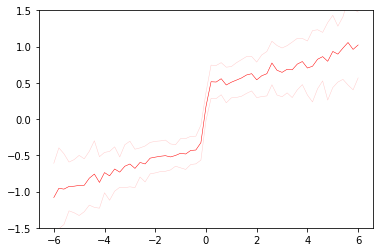

In [10]:
# MC dropout uncertainty figure
plt.figure()
mean = np.mean(repeat_predictions, 0)
std = np.std(repeat_predictions, 0)
plt.plot(x_test, mean, color='red', lw=0.5)
plt.plot(x_test, mean - std, color='red', lw=0.5, alpha=0.2)
plt.plot(x_test, mean + std, color='red', lw=0.5, alpha=0.2)
plt.ylim([-1.5, 1.5])
plt.show()